In [150]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
df=pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

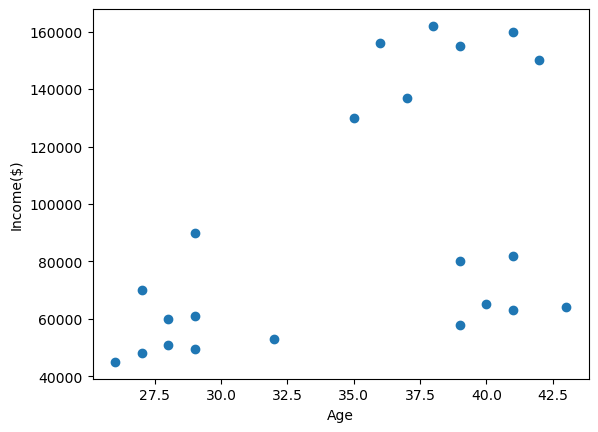

In [152]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [153]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [155]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [149]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


# Scalling Data

In [86]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.fit_transform(df['Income($)'].values.reshape(-1, 1))
scaler.fit(df[['Age']])
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


Text(0, 0.5, 'Income($)')

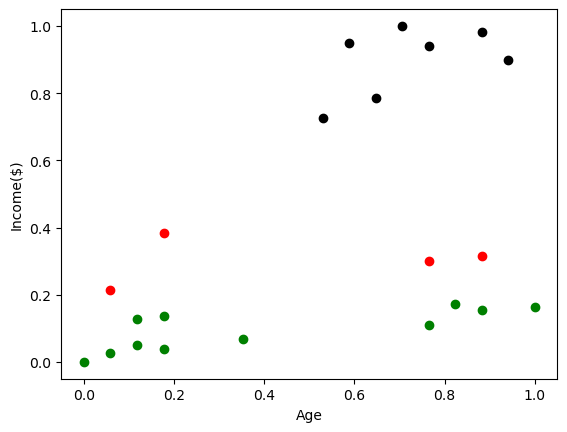

In [87]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='black')
plt.scatter(df3.Age,df3['Income($)'],color='red')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [132]:
km=KMeans(n_clusters=3,n_init=10)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [133]:
df['cluster']=y_predicted
df.drop('cluster',axis='columns',inplace=True)
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [134]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [143]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='Cluster 0')
plt.scatter(df2.Age,df2['Income($)'],color='black',label='Cluster 1')
plt.scatter(df3.Age,df3['Income($)'],color='red',label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'cluster'

In [140]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k,n_init=10)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [141]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.3625079900797329,
 0.26640301246684156,
 0.21055478995472499,
 0.18802714650465532,
 0.13265419827245162,
 0.10629897421405131]

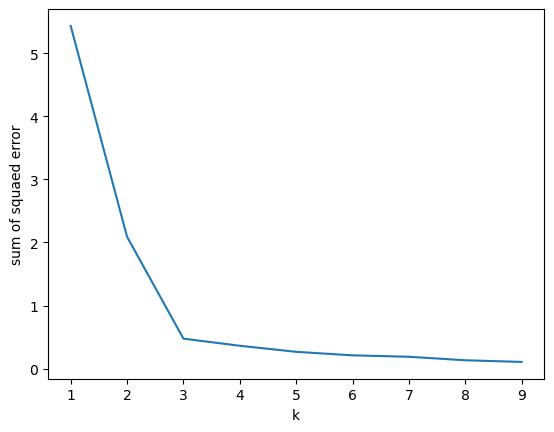

In [142]:
plt.xlabel('k')
plt.ylabel('sum of squaed error')
plt.plot(k_rng,sse)